<a href="https://colab.research.google.com/github/AshishGtmMishra/Data-Visualization-Projects/blob/main/2_Visualization_Data_Using_Web_APIs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is about **visualizing data using web APIs**. It demonstrates how to use **requests** and **pygal** libraries to access and plot data from online sources, such as GitHub and Hacker News. Here are some key points from the notebook:

- **GitHub API**: The notebook shows how to make an API call to GitHub to get information about the most-starred JavaScript projects, and how to use pygal to create a bar chart of the results. It also shows how to use seaborn and matplotlib to create a similar bar chart with a different style.
- **Hacker News API**: The notebook shows how to make an API call to Hacker News to get information about the top submissions, and how to use matplotlib to create a horizontal bar chart of the number of comments for each submission.


In [ ]:
!pip install pygal
!pip install -U requests

In [ ]:
import os

directory = "Charts"

if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
import requests
import pygal
from pygal.style import LightColorizedStyle as LCS, LightenStyle as LS

In [ ]:
# Make an api call and store the status
url = 'https://api.github.com/search/repositories?q=language:javascript&sort=stars';
r = requests.get(url)
print("Status Code: ", r.status_code)

Status Code:  200


In [ ]:
# Store API response in a variable
response_dict = r.json()
print("Total Repositories: ", response_dict['total_count'])

Total Repositories:  15973769


In [ ]:
# Explore information about repositories .
repo_dicts = response_dict['items']
print("Number of items:", len(repo_dicts))

Number of items: 30


In [ ]:
names, plot_dicts = [], []
for repo_dict in repo_dicts:
    names.append(repo_dict['name'])

    plot_dict = {
        'value': repo_dict['stargazers_count'],
        'label': repo_dict['description'],
        'xlink': repo_dict['html_url']
        }
    plot_dicts.append(plot_dict)

# Make Visualization
my_style = LS('#333366', base_style= LCS)
my_config = pygal.Config()
my_config.x_label_rotation = 45
my_config.show_legend = False
my_config.title_font_size = 24
my_config.label_fon_size = 14
my_config.major_label_font_size = 18
my_config.truncate_label = 15
my_config.show_y_guides = False
my_config.width = 1000

chart = pygal.Bar(my_config, style = my_style)
chart.title = 'Most-Starred JavaScript Projects on GitHub'
chart.x_labels = names

chart.add('', plot_dicts)
chart.render_to_file(os.path.join(directory, 'JavaScript_repos_1.svg'))

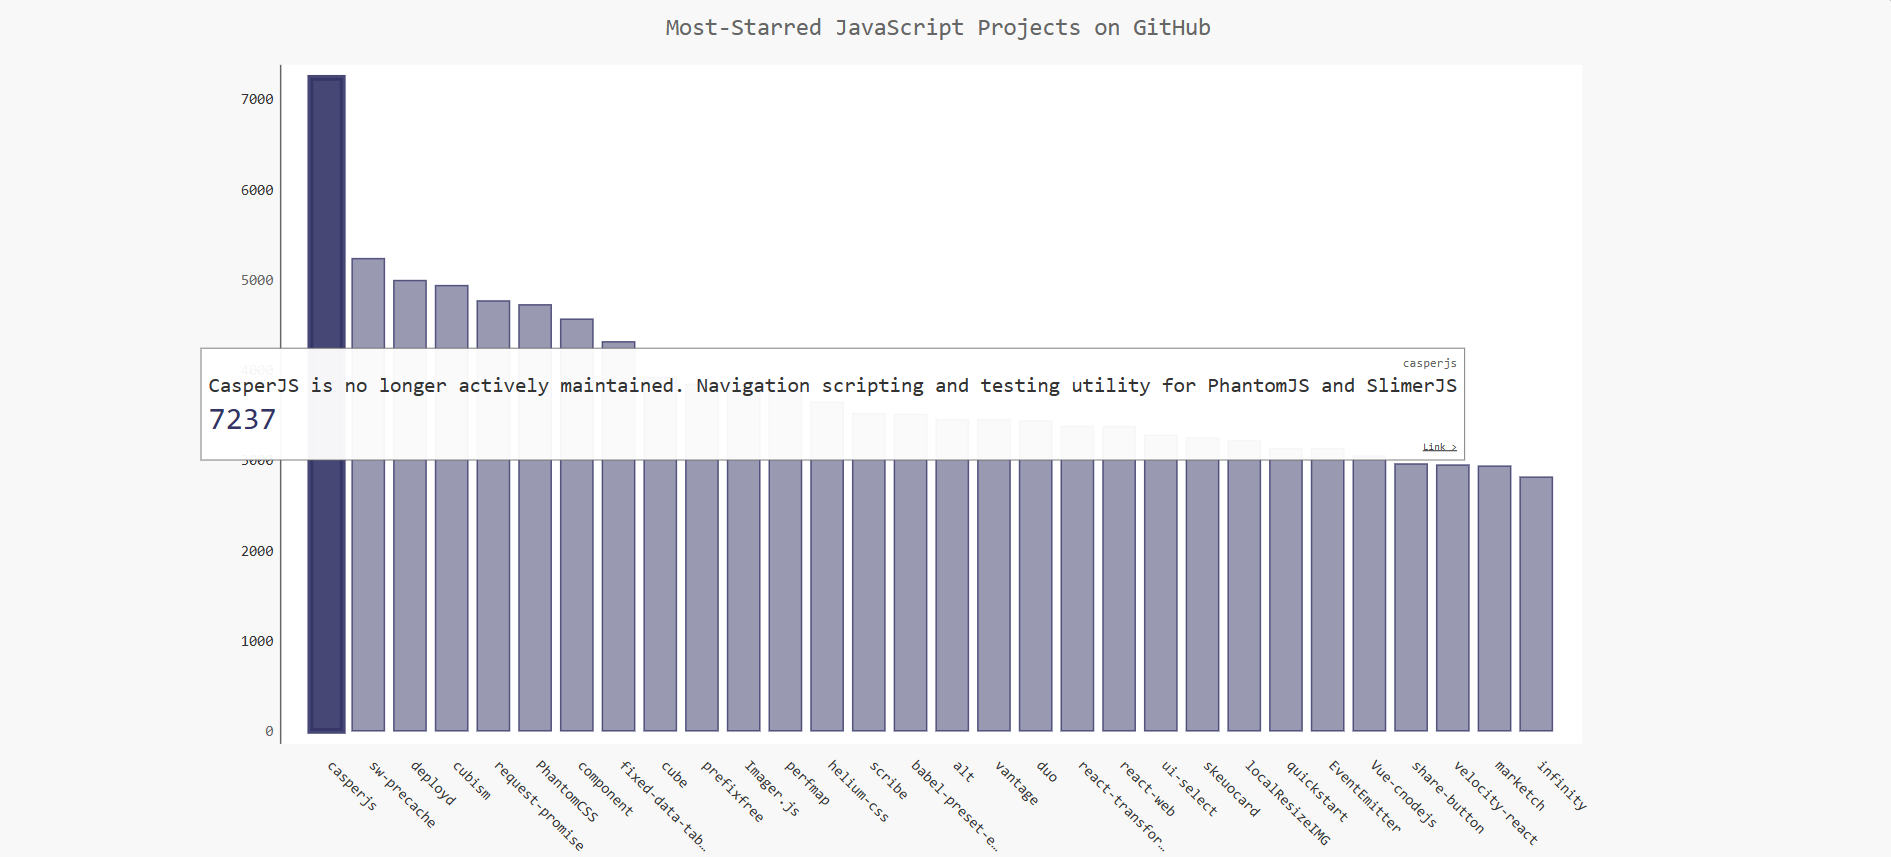

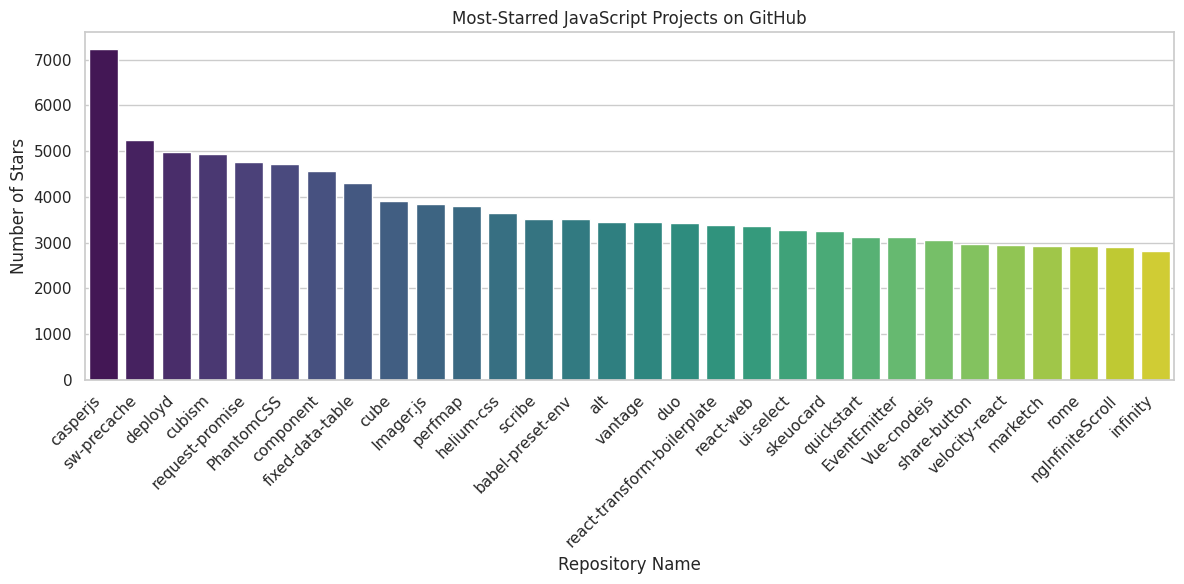

In [ ]:
# Viisualizing the data through Matplotlib and Seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Extract data for visualization
names = [repo_dict['name'] for repo_dict in repo_dicts]
stars = [repo_dict['stargazers_count'] for repo_dict in repo_dicts]

# Set seaborn style
sns.set(style="whitegrid")

# Create a bar plot using seaborn and matplotlib
plt.figure(figsize=(12, 6))
plot = sns.barplot(x=names, y=stars, palette="viridis")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha="right")
plt.title('Most-Starred JavaScript Projects on GitHub')
plt.xlabel('Repository Name')
plt.ylabel('Number of Stars')
plt.tight_layout()
plt.show()


### Hacker News API Visualization

In [ ]:
from operator import itemgetter

url = 'https://hacker-news.firebaseio.com/v0/topstories.json'
r = requests.get(url)
print(f"Status code: {r.status_code}")

Status code: 200


In [ ]:
# Process information about each submission.
submission_ids = r.json()
submission_dicts = []
for submission_id in submission_ids[:10]:
    # Make a separate API call for each submission.
    url = f"https://hacker-news.firebaseio.com/v0/item/{submission_id}.json"
    submission_r = requests.get(url)
    print(f"id: {submission_id}\tstatus: {r.status_code}")
    response_dict = submission_r.json()

    # Build a dictionary for each article.
    submission_dict = {
        'title': response_dict['title'],
        'hn_link': f"http://news.ycombinator.com/item?id={submission_id}",
        'comments': response_dict.get('descendants', 0),
    }
    submission_dicts.append(submission_dict)

id: 38527437	status: 200
id: 38527866	status: 200
id: 38525978	status: 200
id: 38516038	status: 200
id: 38515387	status: 200
id: 38526349	status: 200
id: 38527875	status: 200
id: 38525655	status: 200
id: 38520487	status: 200
id: 38525968	status: 200


In [ ]:
submission_dicts = sorted(submission_dicts, key=itemgetter('comments'),
                            reverse=True)

In [ ]:
for submission_dict in submission_dicts:
    print(f"\nTitle: {submission_dict['title']}")
    print(f"Discussion link: {submission_dict['hn_link']}")
    print(f"Comments: {submission_dict['comments']}")


Title: Dogbolt Decompiler Explorer
Discussion link: http://news.ycombinator.com/item?id=38520487
Comments: 67

Title: I Hacked Magic the Gathering: Arena for a 100% Win Rate
Discussion link: http://news.ycombinator.com/item?id=38525978
Comments: 52

Title: Coding4Fun Hardware Boneyard – Using the CueCat with .NET (2006)
Discussion link: http://news.ycombinator.com/item?id=38526349
Comments: 34

Title: Eclipse: The Demo that Sold 3D to Nintendo
Discussion link: http://news.ycombinator.com/item?id=38525655
Comments: 11

Title: Rest in Peace, Optane
Discussion link: http://news.ycombinator.com/item?id=38527437
Comments: 10

Title: Maelstrom: A workbench for learning distributed systems
Discussion link: http://news.ycombinator.com/item?id=38525968
Comments: 4

Title: NN-SVG
Discussion link: http://news.ycombinator.com/item?id=38516038
Comments: 3

Title: Maths and science animations
Discussion link: http://news.ycombinator.com/item?id=38515387
Comments: 2

Title: Mounting Git commits as f

The above articles where the top articles at the time of creating/updating this project.

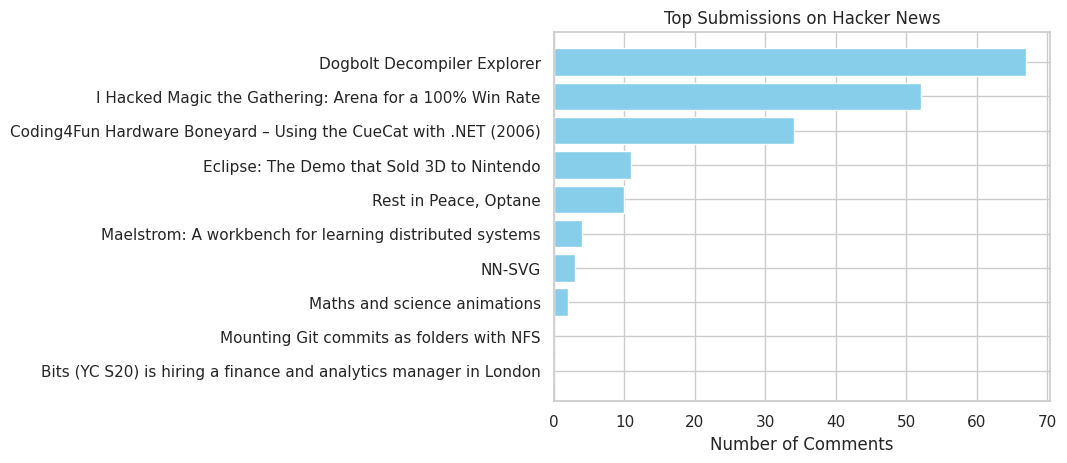

In [ ]:
# Extract data for visualization
titles = [submission_dict['title'] for submission_dict in submission_dicts]
comments = [submission_dict['comments'] for submission_dict in submission_dicts]

# Create a bar chart
plt.barh(titles, comments, color='skyblue')
plt.xlabel('Number of Comments')
plt.title('Top Submissions on Hacker News')
plt.gca().invert_yaxis()
plt.show()